In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
import os
from PIL import Image
import PIL
print(PIL.__version__)
%matplotlib inline

5.2.0


In [11]:
root = "/home/s4k4yume/halite3/datasets/frames"
files = [(os.path.join(root, name), int(name.partition(".")[0])) for name in file_names]

3884.0


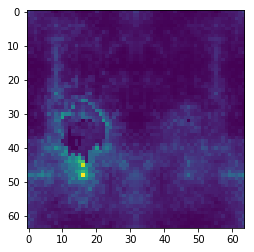

In [30]:
data = np.load(files[0][0])
print(np.amax(data['penalized']))
plt.imshow(data['penalized'])

In [38]:
# Open all the frames
_, __, file_names = next(os.walk(root))

images = []
for file, i in sorted(files, key=lambda f_tuple: f_tuple[1]):
    data = np.load(file)['penalized']
    data = data / np.amax(data) # NORMALIZE
    frame = Image.fromarray(np.uint8(cm.viridis(data) * 255))
    frame = frame.resize((512, 512), resample=Image.NEAREST)
    frame.info['duration'] = 1
    images.append(frame)

# Save the frames as an animated GIF
images[0].save(os.path.join(root, "preview.gif"),
               save_all=True,
               append_images=images[1:],
               loop=0)